In [1]:
import re
import json
import matplotlib.pyplot as plt
import codecs
import numpy as np
import jieba

def load_nerDict(fname):
    nerDict, cnt = [], 0
    with open(fname, 'r', encoding='utf-8') as f:
        for line in f:
            if line.strip():
                cnt += 1
                # print(line)
                nerDict.append(line.strip())
            # if cnt == 2:
            #     break
    print(cnt)
    return nerDict

def get_new_ner(fname):
    ner = set()
    with open(fname, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            entities = data['coreEntityEmotions']
            for a in entities:
                if len(a['entity']) < 9:
                    ner.add(a['entity'])
    return ner
    

def load_train_data(train_file, ner_file):
    
    ner = get_new_ner(train_file)
    nerDict = load_nerDict(ner_file)
    
    for i in ner:
        if i not in nerDict:
            nerDict.append(i)
#     print(len(nerDict))
    
    #更新jieba的词库
    word_invalid = []
    for i in nerDict:
        try:
            jieba.add_word(i)
        except:
            word_invalid.append(i)
    
    title_word = []
    with open(train_file, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            title = jieba.lcut(data['title'].strip())
            title_word.append(title)

    return nerDict, title_word, word_invalid

In [2]:
basedir = '../input_data'
train_file = basedir + '/coreEntityEmotion_train.txt' 
test_file = basedir + '/coreEntityEmotion_test_stage1.txt'
ner_file = basedir + '/nerDict.txt'
stop_words_file = basedir + '/stop_words_mine.txt'

nerDict, title_word, word_invalid = load_train_data(train_file, ner_file)
print(len(nerDict))
print(len(title_word))
print(len(word_invalid))

311284


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\iwin\AppData\Local\Temp\jieba.cache
Loading model cost 0.748 seconds.
Prefix dict has been built succesfully.


321016
40000
0


In [4]:
print(title_word[0:10])

[['sia', '智慧工厂', '展', '，', '誉洋以', '“', '智', '”', '取胜'], ['大', '数据可视化', '应用领域', '探析'], ['大车', '发大财', '的', '时代', '一去不返', '？', '货运', '行业', '还有', '春天', '吗', '？'], ['水泥', '路面', '起砂', '如何', '处理', '？', '修补', '后', '材料', '会', '发生', '脱落', '吗', '？'], ['股市', '高位', '还', '将', '继续', '涨', '，', ' ', '这', '几类', '股票', '有望', '成为', '新', '热点'], ['装机', '容易', '忽视', '的', '组件', '，', '主机', '电源', '不能', '随便', '选'], ['新', '打', '的', '水泥', '地面', '受冻', '掉皮', '怎么', '修复', '？', '修补', '质量', '如何', '保证', '？'], ['信托', '融资', '模式', '下', '房地产信托', '融资', '及', '发展趋势', '解析'], ['地产基金', '投资', '公寓资产', '，', '抓好', '这两点', '是', '关键'], ['心理咨询', '小程序开发', '案例', '分析']]


min:1
max:40
mean:12.557
median:13.0
std:4.267376360247594


(array([6.700e+01, 1.020e+02, 3.070e+02, 5.470e+02, 9.100e+02, 1.292e+03,
        1.746e+03, 2.182e+03, 2.796e+03, 3.048e+03, 3.357e+03, 3.469e+03,
        3.348e+03, 3.240e+03, 3.189e+03, 2.977e+03, 2.557e+03, 1.914e+03,
        1.254e+03, 7.700e+02, 3.780e+02, 1.970e+02, 1.080e+02, 7.600e+01,
        4.500e+01, 3.300e+01, 2.700e+01, 2.400e+01, 1.300e+01, 5.000e+00,
        7.000e+00, 4.000e+00, 1.000e+00, 4.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40.]),
 <a list of 39 Patch objects>)

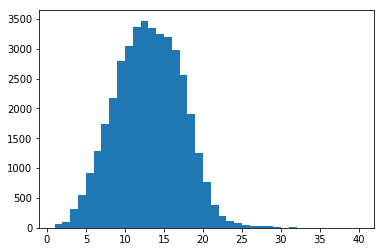

In [7]:
title_word_len = [len(i) for i in title_word]

print("min:{}".format(np.min(title_word_len)))
print("max:{}".format(np.max(title_word_len)))
print("mean:{}".format(np.mean(title_word_len)))
print("median:{}".format(np.median(title_word_len)))
print("std:{}".format(np.std(title_word_len)))
plt.hist(title_word_len, bins=39)

In [8]:
cnt = 0
for i in title_word:
    if len(i) > 30:
        print(i)
        cnt += 1
print(cnt)

['轻巧', '办公', ' ', '如此', '简单', ' ', '|', ' ', 'dell', ' ', '戴尔', ' ', 'xps', ' ', '13', ' ', '9', '37', '0', ' ', '13.3', '"', '笔记本电脑', ' ', '16', 'gb', ' ', '官翻版', ' ', '约', '6956', '元']
['大v', '官宣', '天佑', '复出', '！', '加入', 'nba', '！', '年入', '80', '00', '万', '再续', '传奇', '。', '王冕', '崔阿扎', '连麦', '，', '粉丝', '刷', '礼物', '对骂', '！', '王冕', '曝', '崔阿扎', '年度', '赔惨', '，', '比', '我', '债', '还', '多', '！']
['【', '计算机', '-', '汇纳科技', '(', '30', '06', '09', ')', '】', '谢春生', '、', '陈倩卉', '（', '研究', '助理', '）', '：', '客流', '分析', '领域', '领军者', '，', '数据业务', '战略', '加速', '推进', '-', '2019', '03', '0']
['【', '医药', '-', '长春高新', '(', '00', '06', '61', ')', '】', '江琦', '、', '赵磊', '：', '2018年报', '点评', '：', '生长激素', '继续', '快速增长', '，', '计划', '收购', '金赛', '剩余', '30', '%', '股权', '2019', '03', '06']
['营养', '早参', ' ', '|', ' ', '宏观面', '，', '美国', '2', '月', '制造业', '产出', '连续', '第二个', '月', '下滑', '，', '美国', '第一季', '初', '经济', '成长', '或', '放缓', '，', '美元', '走弱', '，', '金属', '市场震荡', '为主']
['利率下调', '！', '四大行房贷利率', '回归', '基准', '，', '买房成本', '减少

In [9]:
cnt = 0
for i in title_word:
    if len(i) > 25:
        print(i)
        cnt += 1
print(cnt)

['干货', '！', '看', '完', '这', '张图', '，', '我', '记住', '了', '所有', '的', 'k线', '，', '散户', '值得', '收藏', '，', '最', '简单', '的', '也', '是', '最', '实用', '的']
['宝鸡', '演员', '田碧媛', '，', '能', '唱', '女来', '能', '唱', '男', '，', '年届', '七旬', '不', '闲散', '，', '走进', '电台', '《', '西秦', '戏迷', '乐', '》', '，', '听', '她', '谝', '一', '谝']
['钨价格', '3', '-', '4', '月份', '是', '涨', '还是', '跌', '？', '（', '近', '3', '年', '价格', '对比', '分析', '）', '|', '2019', '年', '3', '月', '7', '日', '钨市', '日评']
['七', '部委', '印发', '《', '绿色', '产业', '指导', '目录', '（', '2019', '年版', '）', '》', '，', '三井化学', '在', '中国', '扩大', 'lgfpp', '产能', '，', '沙特阿美', '入局', '氢能', '市场', '…', '…']
['好戏', '早', '知道', '！', '山东', '舞台艺术', '青年', '人才', '创作', '扶持', '项目', '—', '—', '莱芜梆子', '大型', '现代戏', '《', '我喜欢', '大伙', '叫', '我', '书记', '》', '精彩', '上演', '！']
['【', '财税', '金融', '】', '从', '发现', '到', '展现', '—', '—', '谈', '担保', '风险', '的', '揭示', '之道', '（', '《', '中国', '担保', '》', '杂志', '2015', '年', '征文', '大赛', '一等奖', '获奖', '文章', '）']
['猪年网', '红', '爆品', '石棉', '“', '黄果柑', '”', '，', '上市', '啦', '！', '3'